# MNIST Handwritten Digit Classification

## 1. Importing required libraries :

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

## 2. Loading Dataset :

- The dataset consists of 60000 grayscale training images of shape 28*28 and 60000 labels for them stored in x_train and y_train.
- In test data we will have 10000 images of same size as test data and 10000 labels for them in y_test.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


In [5]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(x_test.shape,y_test.shape)

## 3. Preprocessing Data :

- Predefining number of classes and input shape. Since the digits are from 0-9, we will have 10 classes.

- Next we will reshape the train and test images in x_train and x_tes folders.

- Then we will convert the labels(class vectors) into one hot encodings using to_categorically()

- We will see the changes made in shapes of images in both test and train folders

In [7]:
num_classes = 10
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## 4. Model Building :

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

## 5. Plot the model :

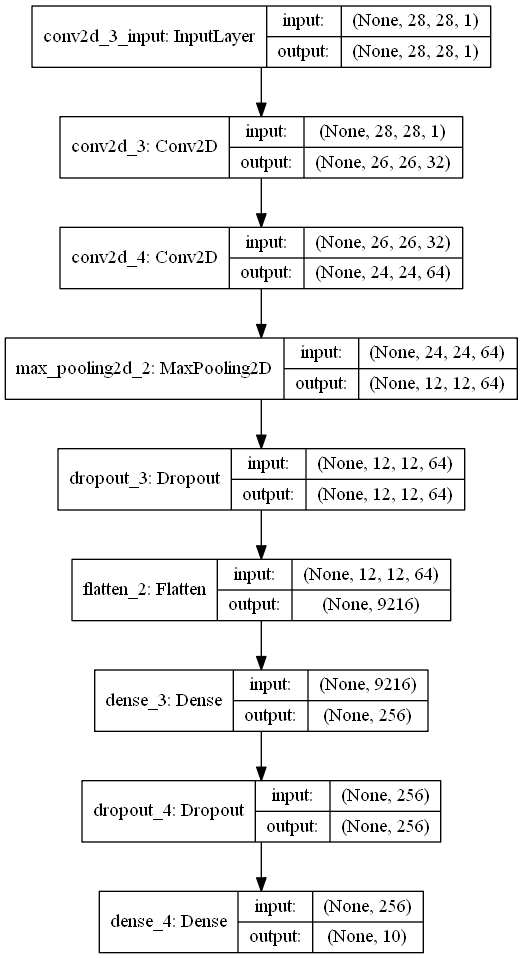

In [15]:
keras.utils.plot_model(model,"MNIST Digit classification.png",show_shapes=True)

## 6. Summary of model :

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

## 7. Training the model using model.fit() :

In [17]:
epochs=10
history = model.fit(x_train, y_train,batch_size=128,epochs=epochs,verbose=1,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 321s 5ms/step - loss: 0.1931 - accuracy: 0.9409 - val_loss: 0.0499 - val_accuracy: 0.9837
Epoch 2/10
60000/60000 [==============================] - 334s 6ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0357 - val_accuracy: 0.9885
Epoch 3/10
60000/60000 [==============================] - 343s 6ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 4/10
60000/60000 [==============================] - 330s 5ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0293 - val_accuracy: 0.9906
Epoch 5/10
60000/60000 [==============================] - 355s 6ms/step - loss: 0.0305 - accuracy: 0.9899 - val_loss: 0.0318 - val_accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0315 - val_accuracy: 0.9911
Epoch 7/10
60000/60000 [==============================] - 279

## 8. Save the model :

In [19]:
model.save('mnist.h5')

## 9. Accuracy of model over test data :

The model.evaluate function predicts the output for the given input and then computes the metrics function specified in the model.compile and based on y_true and y_pred and returns the computed metric value as the output.

model.evaluate() returns two values

- loss
- accuracy


In [20]:
_,accu = model.evaluate(x_test, y_test, verbose=0)
print(accu*100)

99.27999973297119


## 10 .Visualizing results of some digits:

Six


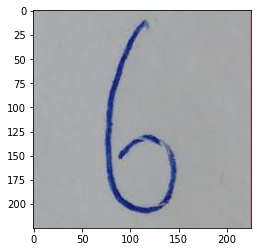

In [57]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
classes = { 1:'Zero',
            2:'One', 
            3:'Two', 
            4:'Three', 
            5:'Four', 
            6:'Five', 
            7:'Six', 
            8:'Seven', 
            9:'eight', 
            10:'Nine'}
img=Image.open(r"C:\Users\User\Desktop\PROJECT 2\Image1.jpg")
plt.imshow(img)
img = img.resize((28,28))
img = img.convert('L')
img = np.array(img)
img = img.reshape(1,28,28,1)
pred=model.predict_classes([img])[0]
print(classes[pred-1])